In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [2]:
from youtube_transcript_api import YouTubeTranscriptApi

id_video = '39ubNuxnrK8'
srt = YouTubeTranscriptApi.get_transcript(id_video, languages=['en'])

print(srt[-1])

{'text': 'Engage.', 'start': 5867.066, 'duration': 1.934}


In [3]:
subtext = []
for i in range(len(srt)):
    subtext.append(srt[i].get('text'))
print(subtext[:10])

['Now approaching your destination.', 'Hi! Welcome to NVIDIA.', 'Welcome to GTC!', 'I hope all of you are well.', 'We have really big announcements and\ncool things to show you today.', 'But first, let me share the new I AM AI.', 'It’s a work of love by NVIDIA’s creative team\nand beautifully tells the stories of the impactful work you do.', 'I am a visionary.', 'Expanding our understanding of the smallest particles,', 'And the infinite possibilities of the universe.']


In [4]:
print(f'length of the subtitle is {len(subtext)}')

length of the subtitle is 968


In [5]:
count = 0
for i in subtext:
    # split string by whitespace then count length
    temp = i.split()
    count += len(temp)
print(f'The average length of sentence in GTC2022 is {count/len(subtext)}')

The average length of sentence in GTC2022 is 11.017561983471074


In [47]:
# create stop word set
import string
from nltk.corpus import stopwords
stop = set(stopwords.words('english') + list(string.punctuation))
stop.add('And')
stop.add('The')
stop.add('’')
stop.add(',')


In [33]:
# join all the elements in subtext into one giant string that used to create word cloud
subtext_str = ' '.join(subtext)
len(subtext_str)

68181

In [34]:
# create a list of string that can be use to create word cloud
subtext_list = []
for i in subtext:
    temp = ''
    for j in i:
        if j != ' ':
            temp +=j
        elif j == ' ':
            subtext_list.append(temp)
            temp = ''
len(subtext_list)

9324

(-0.5, 2999.5, 1999.5, -0.5)

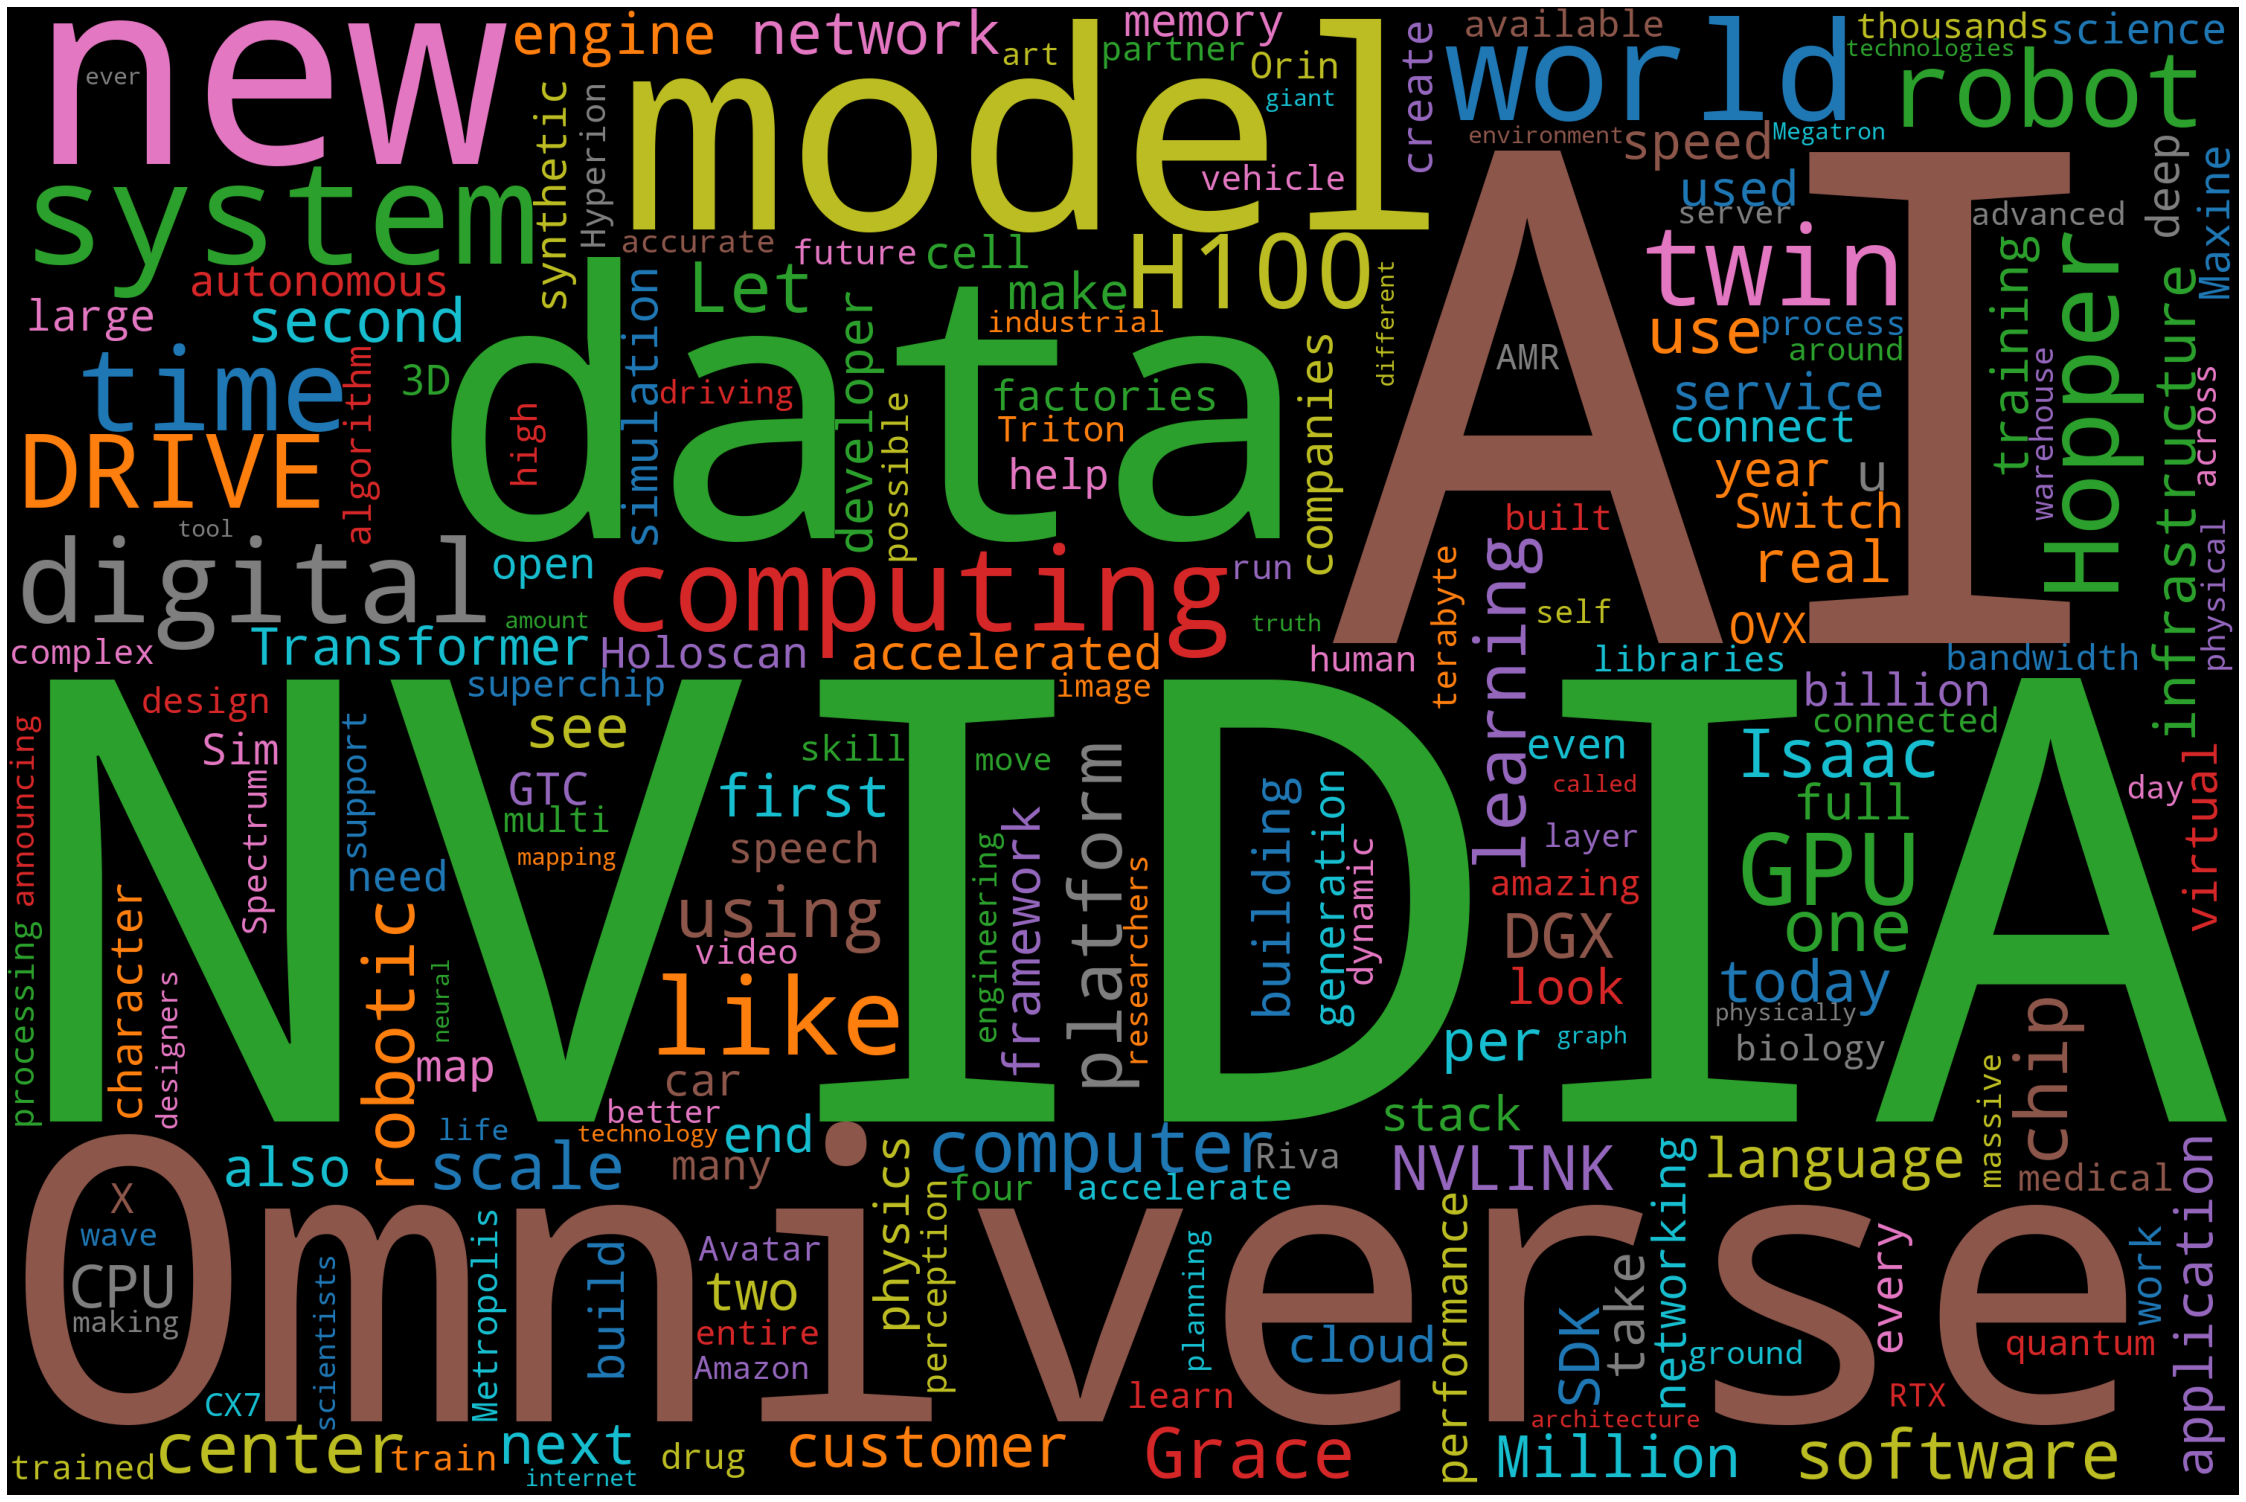

In [35]:
wordcloud = WordCloud(width = 3000,
                      height = 2000,
                      random_state=42,
                      background_color='black',
                      colormap='tab10',
                      collocations=False,
                      stopwords = stop).generate(subtext_str)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)
plt.axis("off")

In [53]:
# add masking colors based on mask image
from PIL import Image
from wordcloud import ImageColorGenerator

(-0.5, 4999.5, 951.5, -0.5)

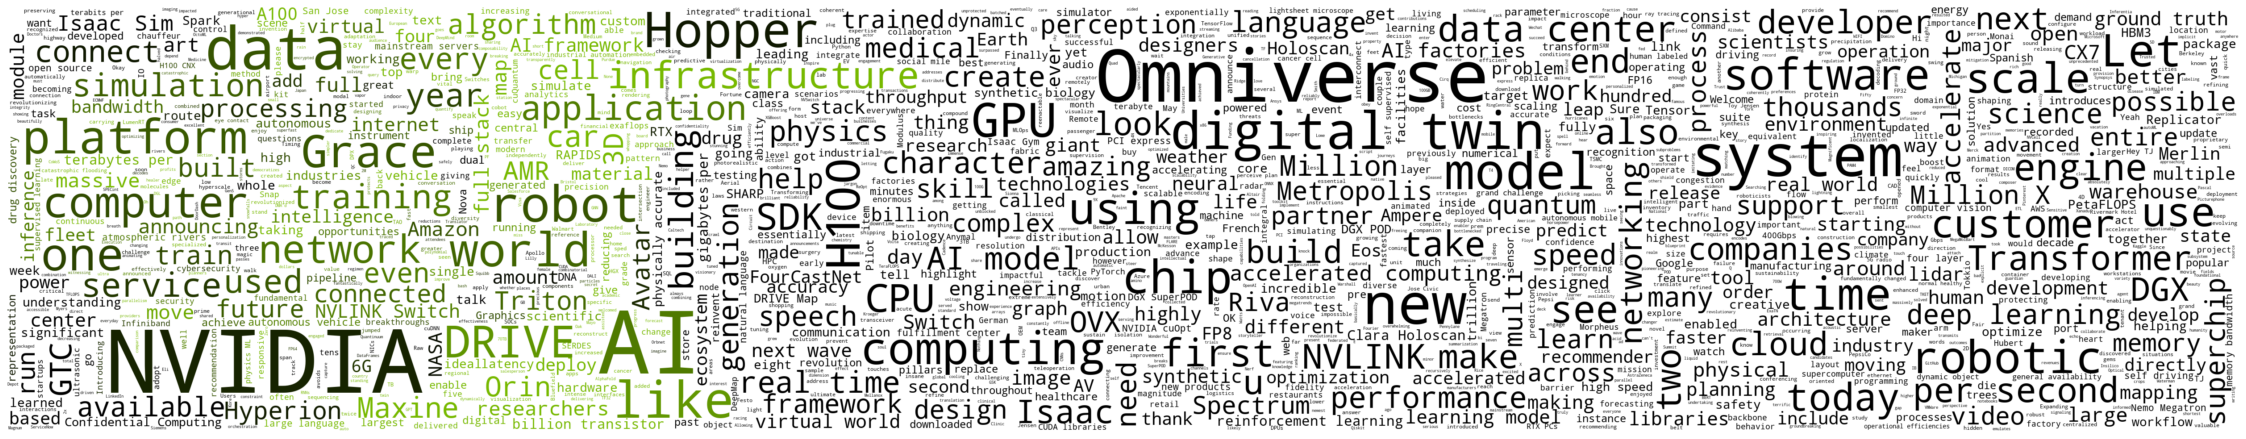

In [57]:
mask = np.array(Image.open('./Nvidia_logo.png'))
mask_colors = ImageColorGenerator(mask)
wordcloud = WordCloud(background_color="white",
                      max_words=1500,
                      mask=mask,
                      stopwords=stop,
                      random_state=42,
                      width=800,
                      height=200,
                      color_func=mask_colors).generate(subtext_str)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

(-0.5, 4999.5, 951.5, -0.5)

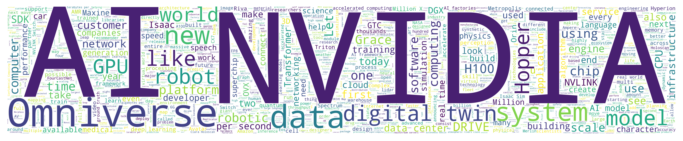

In [55]:
mask = np.array(Image.open('./Nvidia_logo.png'))
wordcloud = WordCloud(background_color="white",
                      max_words=1500,
                      mask=mask,
                      stopwords=stop,
                      random_state=42,
                      width=mask.shape[1],
                      height=mask.shape[0],
                      ).generate(subtext_str)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

In [36]:
# reduce stop words
outputlist = [word for word in subtext_list if word not in stop]


In [37]:
# turn list of string into string for bigram
stopped_str = ' '.join(outputlist)
print(f' The original length of subtitle is {len(subtext_str)}, after stop word the length is {len(stopped_str)}')

 The original length of subtitle is 68181, after stop word the length is 47829


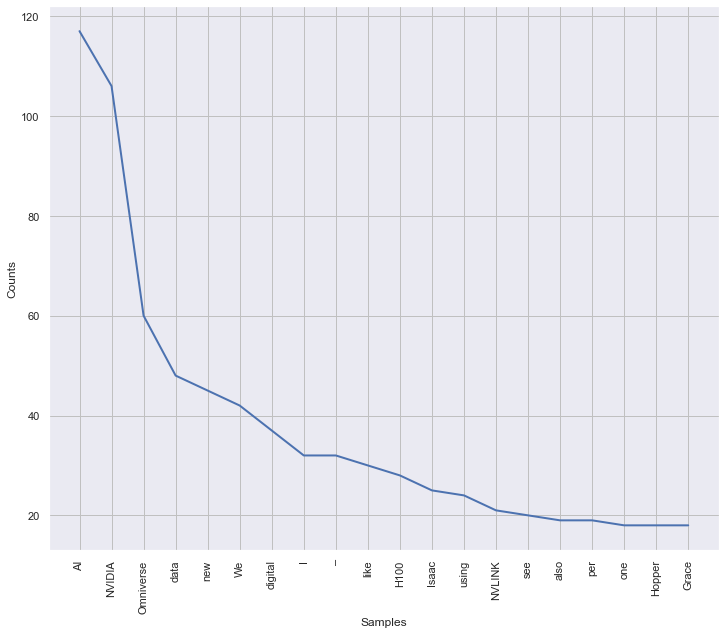

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [38]:
import nltk
%matplotlib inline
sns.set(rc={'figure.figsize':(12,10)})
sns.set_style( 'darkgrid')
# Create freq dist and plot
nlp_words = nltk.FreqDist(outputlist)
nlp_words.plot(20)

In [39]:
print('The top 10 most frequent words in GTC2022')
print(nlp_words.most_common(10))

The top 10 most frequent words in GTC2022
[('AI', 117), ('NVIDIA', 106), ('Omniverse', 60), ('data', 48), ('new', 45), ('We', 42), ('digital', 37), ('I', 32), ('–', 32), ('like', 30)]


In [48]:
nltk.download('punkt')
tokens = nltk.word_tokenize(stopped_str)
temp_stopped = [word for word in tokens if word not in stop]
bigrams = nltk.bigrams(temp_stopped)
frequence = nltk.FreqDist(bigrams)
for key, value in frequence.items():
    print(key,value)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/andycheung/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


('Now', 'approaching') 1
('approaching', 'Hi') 1
('Hi', 'Welcome') 1
('Welcome', 'Welcome') 1
('Welcome', 'I') 1
('I', 'hope') 2
('hope', 'We') 1
('We', 'really') 1
('really', 'big') 1
('big', 'announcements') 1
('announcements', 'cool') 1
('cool', 'things') 1
('things', 'show') 1
('show', 'But') 1
('But', 'first') 2
('first', 'let') 2
('let', 'share') 1
('share', 'new') 1
('new', 'I') 1
('I', 'AM') 1
('AM', 'It') 1
('It', 'work') 1
('work', 'love') 1
('love', 'NVIDIA') 1
('NVIDIA', 'creative') 1
('creative', 'team') 2
('team', 'beautifully') 1
('beautifully', 'tells') 1
('tells', 'stories') 1
('stories', 'impactful') 1
('impactful', 'work') 1
('work', 'I') 1
('I', 'Expanding') 1
('Expanding', 'understanding') 1
('understanding', 'smallest') 1
('smallest', 'infinite') 1
('infinite', 'possibilities') 1
('possibilities', 'I') 1
('I', 'Protecting') 1
('Protecting', 'us') 1
('us', 'insuring') 1
('insuring', 'precious') 1
('precious', 'make') 1
('make', 'home') 1
('home', 'I') 1
('I', 'Sear

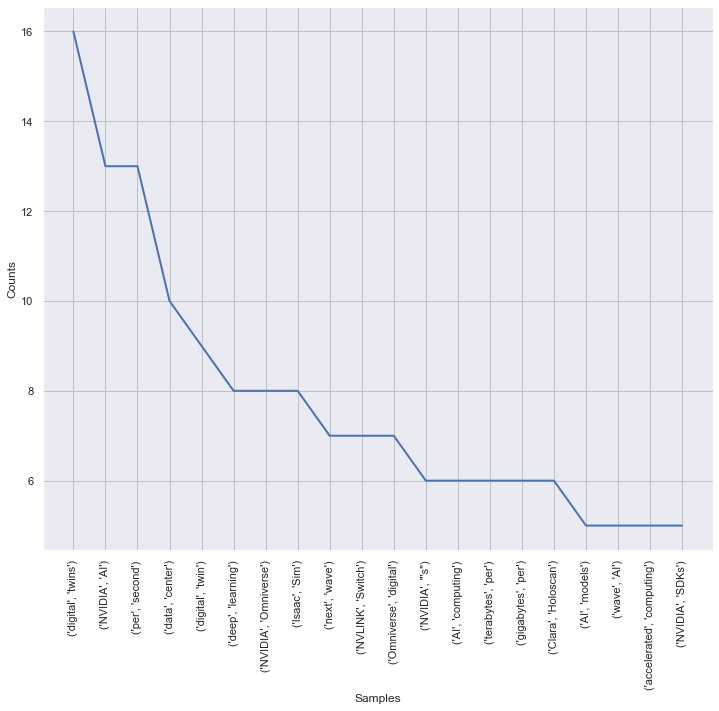

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [49]:
# frequency of bigrams in GTC2022
frequence.plot(20)

In [50]:
print('The top 5 most frequent pair of words in GTC2022')
print(frequence.most_common(5))

The top 5 most frequent pair of words in GTC2022
[(('digital', 'twins'), 16), (('NVIDIA', 'AI'), 13), (('per', 'second'), 13), (('data', 'center'), 10), (('digital', 'twin'), 9)]
